### CLASSIFY SPOTYFY SONGS BY MOOD

In [13]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 481.6 kB/s eta 0:00:001m471.5 kB/s eta 0:00:01


In [3]:
#loading our spotify dataset
df= pd.read_csv("spotify_songs.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.columns


Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [43]:
#droping the unwanted columns
df=df.drop(columns=["Unnamed: 0"])


In [44]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'mood',
       'mood_encoder'],
      dtype='object')

In [10]:
print (df.info)

<bound method DataFrame.info of         Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1    

### relavant features
1.danceability: How suitable a track is for dancing(0-1)

2.energy: Intensity and activity level of a track (0-1)

3.valence: Musical postivility (0-1)

4.tempo: speed of the song (BPM)

5.acousticness: whether a track is acoustic(0-1)

6.instrumentalness: likelihood of the track being instrumental(o-1)

7.speechiness: presence of spoken words(0-1)

8.loudness: overaal volume(dB)

9.mode: major(1) or (0) minor key

19.key: Musical key(0-1)


In [4]:

#Feature Extraction since we have used the available features rather than using librosa to extactract audio features...
features= ['energy','danceability','valence','tempo','acousticness','loudness','instrumentalness','speechiness','key','mode']
df_features=df[features]
df_features.head()


,energy,danceability,valence,tempo,acousticness,loudness,instrumentalness,speechiness,key,mode
0,0.4610,0.676,0.715,87.917,0.0322,-6.746,0.000001,0.1430,1,0
1,0.1660,0.420,0.267,77.489,0.9240,-17.235,0.000006,0.0763,1,1
2,0.3590,0.438,0.120,76.332,0.2100,-9.734,0.000000,0.0557,0,1
3,0.0596,0.266,0.143,181.740,0.9050,-18.515,0.000071,0.0363,0,1
4,0.4430,0.618,0.167,119.949,0.4690,-9.681,0.000000,0.0526,2,1


In [5]:
df_features.isnull().sum()

energy              0
danceability        0
valence             0
tempo               0
acousticness        0
loudness            0
instrumentalness    0
speechiness         0
key                 0
mode                0
dtype: int64

In [11]:
#EDA understanding the distribution of features
#summarry statistics
df_features.describe()

,energy,danceability,valence,tempo,acousticness,loudness,instrumentalness,speechiness,key,mode
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.641383,0.566800,0.474068,122.147837,0.314910,-8.258960,0.156050,0.084652,5.309140,0.637553
std,0.251529,0.173542,0.259261,29.978197,0.332523,5.029337,0.309555,0.105732,3.559987,0.480709
min,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000
25%,0.472000,0.456000,0.260000,99.218750,0.016900,-10.013000,0.000000,0.035900,2.000000,0.000000
50%,0.685000,0.580000,0.464000,122.017000,0.169000,-7.004000,0.000042,0.048900,5.000000,1.000000
75%,0.854000,0.695000,0.683000,140.071000,0.598000,-5.003000,0.049000,0.084500,8.000000,1.000000
max,1.000000,0.985000,0.995000,243.372000,0.996000,4.532000,1.000000,0.965000,11.000000,1.000000


Text(0.5, 1.0, 'Distribution of danceability')

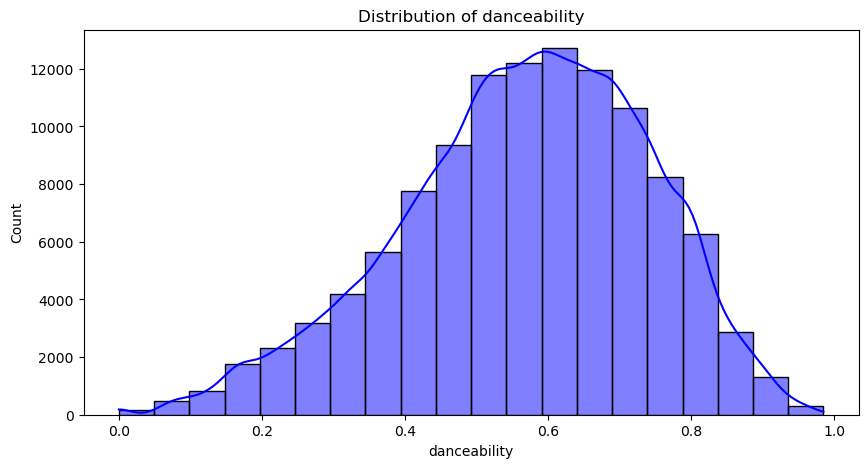

In [19]:
#distribution of key features
plt.figure(figsize=(10,5))
sns.histplot(df["danceability"],bins=20,kde=True,color="blue")
plt.title("Distribution of danceability")

Text(0.5, 1.0, 'valence by mode (0=minor, 1-major)')

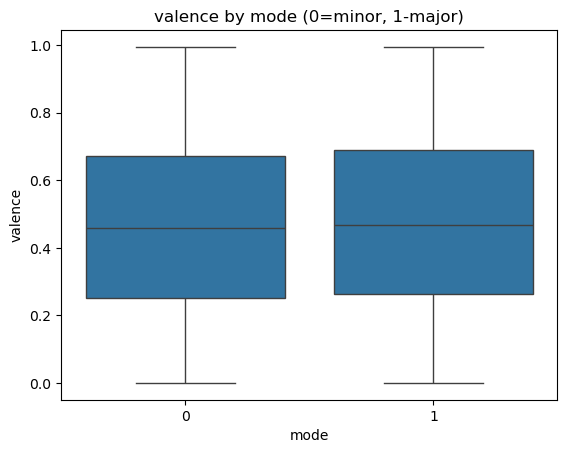

In [26]:
sns.boxplot(x=df["mode"], y=df["valence"])
plt.title("valence by mode (0=minor, 1-major)")

In [27]:
#using clustering (K-Means) to group Songs into moods
#This will group songs into 4(0,1,2,3 mood categories based on their characteristics

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=11,random_state=42)
df["mood_cluster"]=kmeans.fit_predict(df_features)
df["mood_cluster"].head()

    

0    2
1    5
2    5
3    1
4    7
Name: mood_cluster, dtype: int32

In [28]:
#assigning meaningful mood mood labels
mood_mapping = {
    0: "sad",
    1: "Energetic",
    2: "Calm",
    3: "Happy",
    4: "study",
    5: "angry",
    6: "lonely",
    7: "party",
    8: "Rainy day",
    9: "excited",
    10: "Motivational"
    
}
df["mood"]=df["mood_cluster"].map(mood_mapping)

#Dropping the numerical cluster column
df.drop("mood_cluster",axis=1,inplace=True)

In [45]:
# We have a mood column that can be used as the target variable
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'mood',
       'mood_encoder'],
      dtype='object')

In [46]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,mood,mood_encoder
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Calm,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,angry,5
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,angry,5
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Energetic,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,party,8


<AxesSubplot: ylabel='mood'>

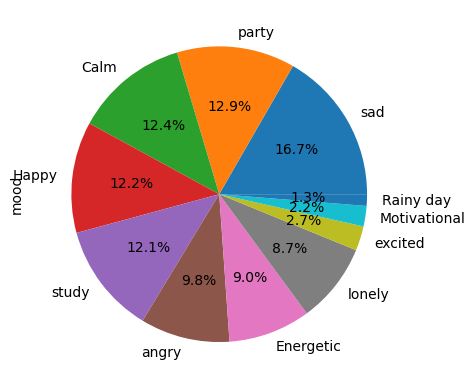

In [31]:
#Overall mood distribution
df["mood"].value_counts().plot.pie(autopct="%1.1F%%")

In [32]:
#occurances of each mood per playlist
mood_counts = df.groupby("album_name")["mood"].value_counts().unstack().fillna(0)

#Top 10 albums with the most songs
top_albums=mood_counts.sum(axis=1).nlargest(10).index
mood_counts=mood_counts.loc[top_albums]

In [33]:
mood_counts

mood,Calm,Energetic,Happy,Motivational,Rainy day,angry,excited,lonely,party,sad,study
album_name,,,,,,,,,,,
Alternative Christmas 2022,16.0,23.0,18.0,15.0,0.0,19.0,1.0,21.0,20.0,42.0,20.0
Feliz Cumpleaños con Perreo,83.0,44.0,4.0,5.0,0.0,4.0,0.0,0.0,7.0,14.0,23.0
Metal,21.0,21.0,14.0,7.0,1.0,12.0,2.0,9.0,18.0,15.0,23.0
Halloween con perreito,52.0,19.0,0.0,4.0,0.0,4.0,0.0,0.0,12.0,10.0,22.0
Halloween Party 2022,9.0,11.0,3.0,1.0,0.0,3.0,0.0,14.0,22.0,39.0,13.0
The Complete Hank Williams,13.0,12.0,15.0,2.0,0.0,12.0,5.0,8.0,27.0,9.0,8.0
Fiesta portatil,37.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,32.0,19.0
Frescura y Perreo,58.0,11.0,4.0,5.0,0.0,4.0,0.0,2.0,2.0,0.0,20.0
Esto me suena a Farra,45.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,22.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Alternative Christmas 2022'),
  Text(1, 0, 'Feliz Cumpleaños con Perreo'),
  Text(2, 0, 'Metal'),
  Text(3, 0, 'Halloween con perreito'),
  Text(4, 0, 'Halloween Party 2022'),
  Text(5, 0, 'The Complete Hank Williams'),
  Text(6, 0, 'Fiesta portatil'),
  Text(7, 0, 'Frescura y Perreo'),
  Text(8, 0, 'Esto me suena a Farra'),
  Text(9, 0, 'Perreo en Halloween')])

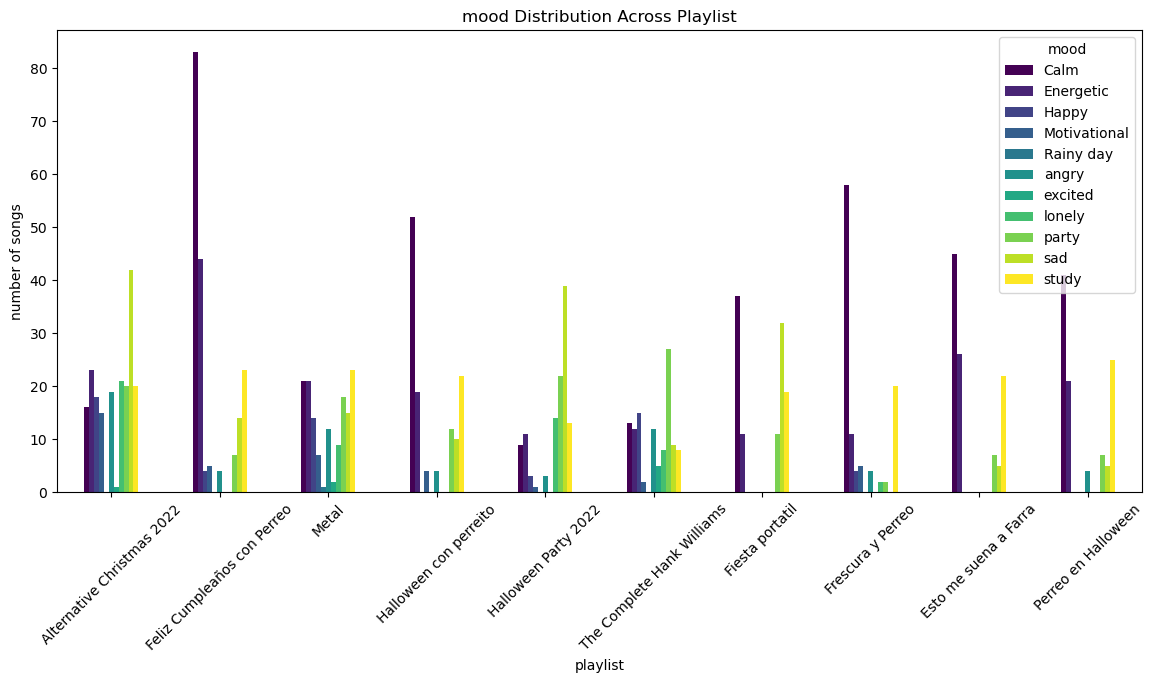

In [34]:
#mood distribution plot

mood_counts.plot(kind="bar",colormap="viridis",figsize=(14,6))
plt.xlabel("playlist")
plt.ylabel("number of songs")
plt.title("mood Distribution Across Playlist")
plt.xticks(rotation=45)

In [35]:
# Normalize the features since there have different scales
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_features_scaled=scaler.fit_transform(df_features)



Text(0.5, 1.0, 'Mood clustering visualization')

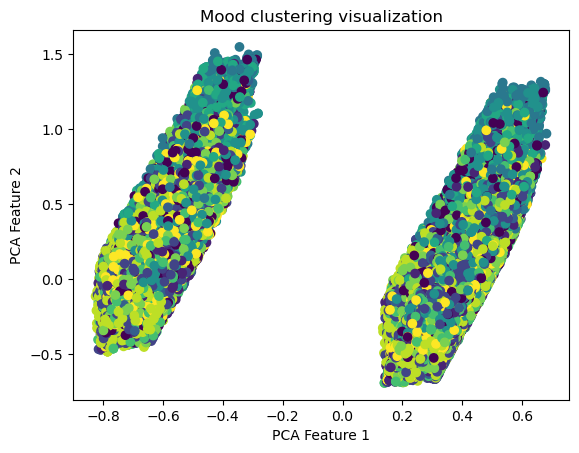

In [36]:
#validating clusters by visualizing with PCA
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca_features=pca.fit_transform(df_features_scaled)
plt.scatter(pca_features[:,0],pca_features[:,1], c=df["mood"].astype("category").cat.codes)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("Mood clustering visualization")



In [37]:
#Encode the mood labels into numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['mood_encoder']= encoder.fit_transform(df['mood'])

In [49]:
#correlation Analysis
#High correlation features with similar bahaviour
#Negative correlation opposing patterns eg loudness vs instrumentalness=-0.433477
corr_matrix=df.corr()
corr_matrix

/tmp/ipykernel_11440/363827394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood_encoder
popularity,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073,0.000104
duration_ms,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225,0.018520
explicit,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386,-0.030782
danceability,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,0.180039
energy,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,0.037494
key,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,0.005943
loudness,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992,0.013683
mode,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092,-0.015038
speechiness,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011,-0.072396
acousticness,-0.025472,-0.103788,-0.094403,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138,-0.054543


/tmp/ipykernel_11440/598577562.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<AxesSubplot: >

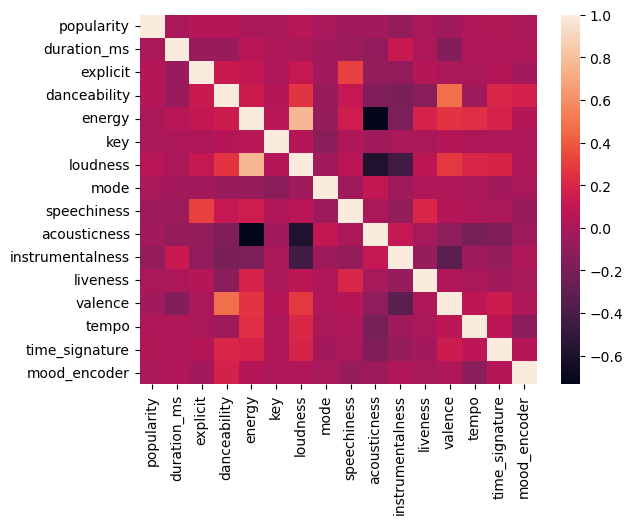

In [47]:
#visualize correlation
sns.heatmap(corr_matrix,fmt=".2f")

In [50]:
# Split into trainig and testing sets
from sklearn.model_selection import train_test_split
X=df_features_scaled
Y=df['mood_encoder']
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)


### Classification model using Decision Tree Model

In [51]:
#classification model using Decision tree model
from sklearn.tree import DecisionTreeClassifier
rfc= DecisionTreeClassifier(criterion="gini",max_depth=5, random_state=42)
rfc.fit(X_train,Y_train)


#prediction
y_pred=rfc.predict(X_test)


## Interpretation of confusion matrix.

The diagonal represents number of correct prediction for each class and 
off diagonal counts  missclassification, how instances of one class are wrongly predicted.

In [54]:
#METRICS 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

matrix=(confusion_matrix(Y_test,y_pred))
matrix

array([[2746,    0,    0,    0,    0,   61,    0,    0,    0,    0,    5],
       [   0, 2079,    0,    1,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 2774,    0,    0,    0,    6,    4,    0,    6,    0],
       [   0,    0,    0,  509,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  190,   67,    0,    0,    0,    0,    0],
       [  38,    0,    0,    0,   25, 2167,    0,    0,    0,    0,    0],
       [   0,    0,   58,    0,    0,    0,  466,    0,   27,   37,    1],
       [   0,    0,    2,    0,    0,    0,    5, 2020,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   12,    0, 2981,   15,    7],
       [   0,    0,    4,    0,    0,    0,    7,    0,    6, 3780,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    8,    0, 2685]])

In [56]:
#accuracy prediction

print("Accuracy:", accuracy_score(Y_test,y_pred))

Accuracy: 0.9823245614035088


### Interpretation of classification report and what it tells about  our model
Precision: Accuracy of postive predication.
Recall: Capturing most of the actual postive instances.
F1-score: Shows a balanced performance between precision and recall

Our model has has high macro average for precision(97%) recall(95%) and f1-score(96%) this implies that overall most prediction are correct across all classes.

It has also high weighted average for precision(98%),recall(98%) and f1-score(98%) reflects overall strong performance but is more influenced by the performance on classes with more data

It has an overall accuracy of (98%) the proportion of correct predication.




In [72]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2812
           1       1.00      1.00      1.00      2080
           2       0.98      0.99      0.99      2790
           3       1.00      1.00      1.00       509
           4       0.88      0.74      0.81       257
           5       0.94      0.97      0.96      2230
           6       0.94      0.79      0.86       589
           7       1.00      1.00      1.00      2027
           8       0.99      0.99      0.99      3015
           9       0.98      1.00      0.99      3797
          10       1.00      1.00      1.00      2694

    accuracy                           0.98     22800
   macro avg       0.97      0.95      0.96     22800
weighted avg       0.98      0.98      0.98     22800



## Testing presence of overfitting for our model
Testing for overfitting we did a comparison between trainig and testing accuraccy, the accuraccy were almost the same which implied that there was no presence of overfitting in our model and hence the model was ready to predict the mood of a new song.

In [53]:
#comparing between train and test accuraccy
train_accuracy=rfc.score(X_train,Y_train)
test_accuracy=rfc.score(X_test,Y_test)
print(f"Training Accuracy: {train_accuracy: .4f}")
print(f"Testing Accuracy: {test_accuracy: .4f}")



Training Accuracy:  0.9826
Testing Accuracy:  0.9823


In [57]:
 #tree visualizatiom
from sklearn.tree import export_graphviz
import graphviz
dot_data=export_graphviz(
    rfc,out_file=None, filled=True, rounded=True,feature_names=features,class_names= df["mood"].astype("category").cat.categories
)
graph=graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()



'decision_tree.pdf'

### Predict the mood of new a song.

In [58]:
new_song=[[0.02,0.1,0.1,10,0.9,-2,0.023,0.1,1,1]]
predicted_mood = rfc.predict(new_song)
print("predicted Mood; ",encoder.inverse_transform(predicted_mood)[0])

predicted Mood;  Motivational
